In [46]:
# import topics for exam
import pandas as pd
import pyarrow
import fastparquet
import numpy as np
import sklearn.linear_model as skmod
import sklearn
import matplotlib as plt
import datetime
import sklearn.preprocessing as skprepro
import sklearn.model_selection
import matplotlib.pyplot as plt
import sklearn.model_selection as sksel


## LECTURE 8

In [ ]:
# to read parquet file
df_origin = pd.read_parquet("path") 
# select only a part of the data
df_select = df_origin[df_origin['Name'] == 'GOOGL'] 
# reset index, drop = True
df_select.reset_index(inplace = True, drop = True)


: 

In [ ]:
# make plot without x axis
df_select.plot(y = 'Open')
#you can also use another column as x axis
df_select.plot(x = 'Date', y = 'Open')

#You can select even smaller amount of data
df_select = df_select[df_select['Date'] > datetime.datetime(2022,8,1)]
print(df_select)


In [ ]:
#use the bar kind
#use the kind attribute
df_select.plot(kind = 'bar', x = 'Date', y = ['Close', 'High'])

#use the horizontal bar kind
df_select.plot(kind = 'barh', x = 'Date', y = 'Open')

# use the histogram
df_select.plot(kind = 'hist', y = ['Open', 'Close'])

In [ ]:
# for more plots go to the Practice_8/lectture_8_mond.ipynb

In [ ]:
# Add column:
#percentage change for 'Open'
#price_day(i) - price_day(i-1) / price_day(i) *100
df = df_origin[df_origin['Name'] == 'GOOGL'].copy()
df.reset_index(inplace = True, drop = True)
perc = []
for index, line in df.iterrows():
    if index == 0:
        perc.append(0)
    else:
        perc.append((line['Open'] - df.loc[index-1, 'Open'] ) / line['Open'] *100)

df['perc_Open'] = perc
print(df)

## LECTURE 9

## Numpy

In [3]:
#Create your fisrt numpy array in 1 dimension
list_ = [1,2,3,4,5]
print(list_)
arr = np.array([1,2,3,4,5])
print(arr)

[1, 2, 3, 4, 5]
[1 2 3 4 5]


In [5]:
#Create your first 2 dimensionnal arry
arr = np.array([[1,2,3], [4,5,6]])
print(arr)
#the copy and the view
list1 = [1,2,3]
list2 = list1.copy()
list2[0] = 25
print(list2)
print(list1)

[[1 2 3]
 [4 5 6]]
[25, 2, 3]
[1, 2, 3]


In [6]:
#the copy and the view
arr1 = np.array([1,2,3,4,5])
arr2 = arr1.view()
arr3 = arr1.copy()
arr2[0] = 25
arr3[0] = 100
print(arr1)
print(arr2)
print(arr3)

[25  2  3  4  5]
[25  2  3  4  5]
[100   2   3   4   5]


In [7]:
#The shape of an array
arr = np.array([[1,2,3], [4,5,6]])
print(arr.shape)
print(arr)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [8]:
#reshape your array from 1D to 2D
arr1 = np.array([1,2,3,4,5,6])
print(arr1.shape)
print(arr1)
arr1 = arr1.reshape((3,2))
print(arr1.shape)
print(arr1)

(6,)
[1 2 3 4 5 6]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [9]:
#reshape your array from 1D to another D (with -1)
arr1 = np.array([1,2,3,4,5,6])
print(arr1.shape)
print(arr1)
arr1 = arr1.reshape((-1,2))
print(arr1.shape)
print(arr1)

(6,)
[1 2 3 4 5 6]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [10]:
#from line to column
arr1 = np.array([1,2,3,4,5,6])
print(arr1.shape)
print(arr1)
arr1 = arr1.reshape((-1,1))
print(arr1.shape)
print(arr1)

(6,)
[1 2 3 4 5 6]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [11]:
#The avantage of numpy, the use of array for addition or multiplication for example
l1 = [1,2,3]
l1 = np.array(l1)
print(l1 + 2)
#
l1 = [1,2,3]
l1 = np.array(l1)
print(l1 * 2)

[3 4 5]
[2 4 6]


In [13]:
#YOUR TURN (5 minutes)
#Change this array [1,5,9,31,45,78]
#into this one:
#[[1,5],
#[9,31],
#[45,78]]
#It should be a copy not a view
arr = np.array([1,5,9,31,45,78])
arr = arr.reshape((3,2))
print(arr)

[[ 1  5]
 [ 9 31]
 [45 78]]


In [14]:
#Transformation of data in the requiered array for scikit-learn
x = [1, 2.1, 3.5, 3.9, 5.3, 6]
print(x)
x = np.array(x)
print(x)
x = x.reshape((-1,1))
print(x)

y = [8,9,10,11,12,13]
print(y)
y = np.array(y)
print(y)
y = y.reshape((-1,1))
print(y)

[1, 2.1, 3.5, 3.9, 5.3, 6]
[1.  2.1 3.5 3.9 5.3 6. ]
[[1. ]
 [2.1]
 [3.5]
 [3.9]
 [5.3]
 [6. ]]
[8, 9, 10, 11, 12, 13]
[ 8  9 10 11 12 13]
[[ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]


## The linear regression

In [16]:
#Create a linear regression model: LinearRegression()
model = skmod.LinearRegression()
#some parameters than you can change:
#fit_intercept (consider b=0 if False, default is True)

In [17]:
#Train your model
model_trained = model.fit(x, y)

In [18]:
#get the result: the intercept (b)(.intercept_), the coeff (w1)(.coef_) and the R2 (.score(x, y))
#get b value
print(model.intercept_)
#get the coef : the w1 value
print(model.coef_)
#get the accuracy with R2
print(model.score(x, y))

[6.91851296]
[[0.98573038]]
0.9857303792714982


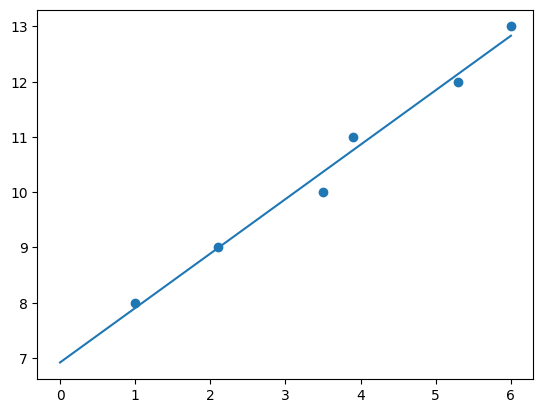

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
x_model = [0, 6]
y_model = [0.98573038 * 0 + 6.91851296, 0.98573038 * 6 + 6.91851296]
#graphic
plt.plot(x_model, y_model)

In [20]:
#Now use your model to predict data (.predict(x))
x_model = np.array([0,6]).reshape(-1,1)
print(model.predict(x_model))

[[ 6.91851296]
 [12.83289523]]


In [21]:
#Predict the result without predict but with intercept and coeff
x_model = [0, 6]
y_model = [0.98573038 * 0 + 6.91851296, 0.98573038 * 6 + 6.91851296]
print(y_model)

[6.91851296, 12.83289524]


## LECTURE 10

In [27]:
#YOUR TURN (15 minutes)
#Use the folowwing data to create a linear regression model and train it:
# feature 1 | Label
#--------------------
#   25      |   80
#   100     |   254
#   30      |   152
#   5       |   4
#   85      |   271

#The coeff use to preduce data was 2,56 and the intercept was 23
#How close are you (How high is the score)?
#Draw the graph of the datas and your prediction

[[2.6183161]]
[23.90251108]
0.8985431805527473
[[ 23.90251108]
 [285.73412112]]


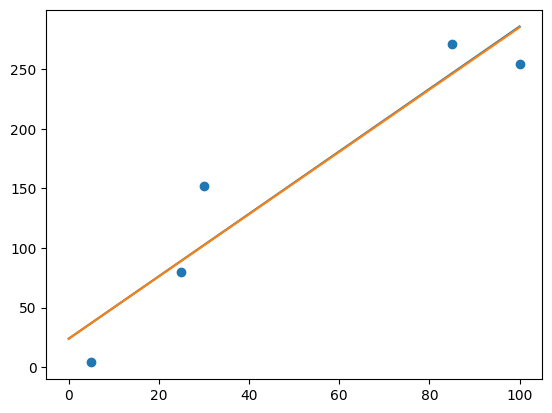

In [28]:
arr_x = np.array([25, 100, 30, 5, 85]).reshape(-1,1)
arr_y = np.array([80, 254, 152, 4, 271]).reshape(-1,1)
model = skmod.LinearRegression()
model = model.fit(arr_x, arr_y)
print(model.coef_)
print(model.intercept_)
print(model.score(arr_x, arr_y))
plt.scatter(arr_x, arr_y)
print(model.predict(np.array([0,100]).reshape(-1,1)))
plt.plot([0, 100], model.predict(np.array([0,100]).reshape(-1,1)))
plt.plot([0, 100], [23.9, 285])

## For multiple dimension

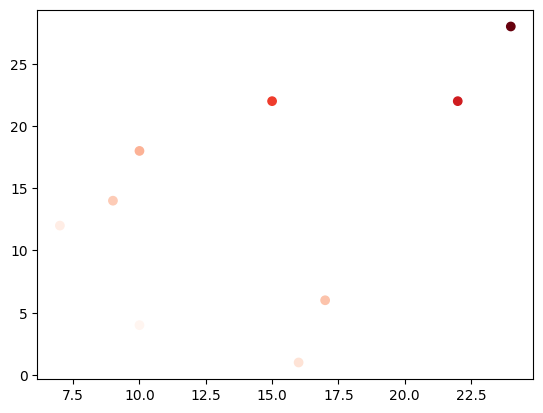

In [29]:
#Our datas: the students work
x1 = [9, 10, 16, 22, 17, 7, 10, 24, 15]
x2 = [14, 18, 1, 22, 6, 12, 4, 28, 22]
y = [42.8, 48.8, 36.8, 81.1, 44.8, 32.4, 28.8, 100, 73.1]

#Draw the data in 2d with colors
plt.scatter(x1, x2, c = y, cmap = 'Reds')

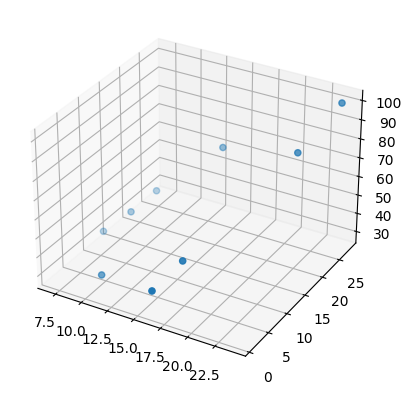

In [30]:
#Draw in 3D
ax = plt.subplot(projection='3d')
ax.scatter(x1, x2, y)

In [31]:
#Transform our data for scikit-learn
arr_x1 = np.array(x1).reshape(-1,1)
arr_x2 = np.array(x2).reshape(-1,1)
arr_y = np.array(y).reshape(-1,1)
# print(arr_x1)
arr_x = np.hstack([arr_x1, arr_x2])
print(arr_x)

[[ 9 14]
 [10 18]
 [16  1]
 [22 22]
 [17  6]
 [ 7 12]
 [10  4]
 [24 28]
 [15 22]]


In [32]:
#create and train the model
model = skmod.LinearRegression()
model_trained = model.fit(arr_x, arr_y)

In [33]:
#use the model for prediction
arr_pred = np.array([[5, 6], [6, 18]])
print(arr_pred)
print(model_trained.predict(arr_pred))

[[ 5  6]
 [ 6 18]]
[[19.6905668 ]
 [42.17289697]]


## The polynomial regression


In [34]:
#Remember: A polynomial regression of degree two is just 
#a linear regression with two features where the second feature
#is the square of the first one

In [35]:
#Our data: the number of goats
alt = [3.25, 0.816, 4.376, 1.314, 3.982, 2.957, 2.482, 3.7]
n_goats = [21, 22, 13, 25, 17, 23, 23, 27]

#The simplest way to do it: the square method
alt_sq = []
for i in alt:
    alt_sq.append(i**2)
print(alt_sq)


[10.5625, 0.6658559999999999, 19.149376000000004, 1.7265960000000002, 15.856324000000003, 8.743848999999999, 6.160324000000001, 13.690000000000001]


In [36]:
#CReate the arrays
arr_x = np.array(alt).reshape(-1,1)
arr_x2 = np.array(alt_sq).reshape(-1,1)
arr_X = np.hstack([arr_x, arr_x2])
arr_y = np.array(n_goats).reshape(-1,1)

In [37]:
#Create the model and train it
model = skmod.LinearRegression()
model = model.fit(arr_X, arr_y)

In [38]:
#show the coefficients
print(model.coef_)
print(model.intercept_)
#equation: y' = 8.23*x -1.9665 * x^2 + 16.65

[[ 8.23020929 -1.96652729]]
[16.6580818]


In [39]:
#create data for model
model_x = list(np.arange(0,6,0.1))
model_y = []
for i in model_x:
    model_y.append(model.predict(np.array([[i, i**2]]))[0])

In [40]:
#YOUR TURN (15 minutes)
#Find the link between these values (use linear and polynomial regression)
#
# feature  Label
# 13       505
# 3        35
# 17       836
# 0        -6
# 2         16
#The equation used is 2,56*x^2 + x*6 -6, 
#Can you find it with your regression?

x = [13, 3, 17, 0, 2]
y = [505, 35, 836, -6, 16]
x2 = []
for i in x:
    x2.append(i**2)
x_arr = np.array(x).reshape(-1,1)
x2_arr = np.array(x2).reshape(-1,1)
y_arr = np.array(y).reshape(-1,1)
X = np.hstack([x_arr, x2_arr])
model = skmod.LinearRegression()
model = model.fit(X, y_arr)
print(model.coef_)
print(model.intercept_)

[[6.05253902 2.55824485]]
[-6.15443798]


In [41]:
#Let's show the difference with a linear regression - make the linear model
model_lin = skmod.LinearRegression()
model_lin = model_lin.fit(x_arr, y_arr)

#show the linear model's equations
print(model_lin.coef_)
print(model_lin.intercept_)

#create model x and y
model_x = np.arange(0,20,0.1)
model_y = 2.56*model_x**2 + 6*model_x -6

[[49.61061947]]
[-70.07433628]


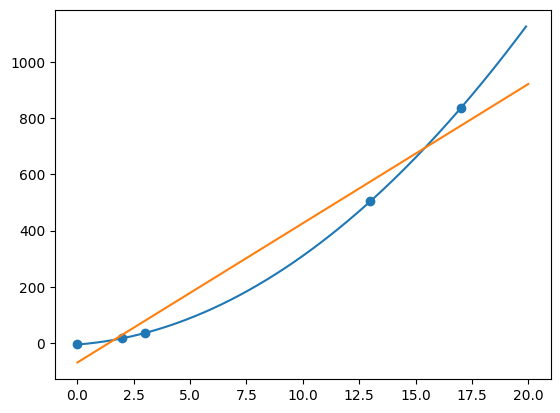

In [42]:
#draw the datas, the linear and polynomial model on the same graph
plt.scatter(x_arr, y_arr)
plt.plot(model_x, model_y)
plt.plot([0,20], model_lin.predict(np.array([[0], [20]])))

## Lecture 11


In [47]:
#Create data and reshape it
x = [1, 2, 3, 4, 5, 6]
x = np.array(x).reshape(-1,1)
print(x)

#Create the polynomial feature object from the preprocessing module
#PolynomialFeatures() function
#choose the degree and don't include bias
poly2 = skprepro.PolynomialFeatures(2, include_bias = False)

#Transform your data into features of degree two, fit_transform() function
x = poly2.fit_transform(x)
print(x)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]]


In [49]:
#From the data of practice, make a polynomial regression of degree 4
#print the prediction of the model for x = 2.2
x= [6,10,2,3,4,0,7,8,9,1]
y = [130,21,43,76,105,3,167,162,91,15]
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
poly2 = skprepro.PolynomialFeatures(4, include_bias = False)
model = skmod.LinearRegression().fit(poly2.fit_transform(x), y)
print(model.predict(poly2.fit_transform(np.array([[2.2]]))))


[[49.10205127]]


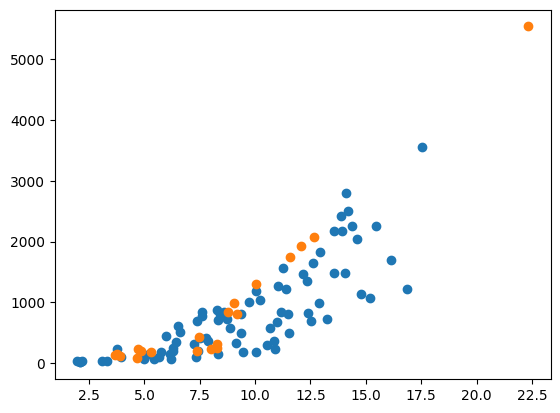

In [54]:
#choose a test and train set with scikit-learn:
#import sklearn.model_selection and use the train_test_split() function
#The order is train/test, train/test
import matplotlib.pyplot as plt
import sklearn.model_selection as sksel

data_x_train, data_x_test, data_y_train, data_y_test = sksel.train_test_split(data_x,
                                                                              data_y,
                                                                             train_size = 0.80,
                                                                             shuffle = True)

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

### The scikit-learn object

In [56]:
#Create two features with different size with random (use function np.random.randint())
data_x1 = np.random.randint(10000, 20000, size = (20))
data_x2 = np.random.randint(0, 100, size = (20))
print(data_x1)
print(data_x2)

#Create the scaler object StandardScaler() object 
import sklearn.preprocessing as skprepro
scaler_standard = skprepro.StandardScaler()


#prepare our data: 2 columns because 2 features
data_x1 = data_x1.reshape(-1,1)
data_x2 = data_x2.reshape(-1,1)
data_x = np.hstack([data_x1, data_x2])

label =  np.random.randint(0, 100, size = (20))

#use it on your data with the fit_transform()
data_x_stan = scaler_standard.fit_transform(data_x)
print(data_x[:10])
print(data_x_stan[:10])

[14384 14001 12248 13015 14714 13557 11968 10262 14304 16132 19784 12607
 10912 15791 11381 13306 10307 17026 13224 15766]
[86 67 69 96 62 79 18 48 82 92 85 67 22 89 63 94  8 37 20 60]
[[14384    86]
 [14001    67]
 [12248    69]
 [13015    96]
 [14714    62]
 [13557    79]
 [11968    18]
 [10262    48]
 [14304    82]
 [16132    92]]
[[ 0.27924066  0.87658912]
 [ 0.11458948  0.17679108]
 [-0.63902284  0.25045403]
 [-0.30929058  1.24490388]
 [ 0.42110722 -0.0073663 ]
 [-0.07628551  0.61876879]
 [-0.75939446 -1.62795122]
 [-1.49280155 -0.52300695]
 [ 0.24484877  0.72926322]
 [ 1.03070349  1.09757797]]


In [57]:
#Use inverse_transform method to come back for standardized data to real data
print(scaler_standard.inverse_transform([[0.1, 0.1]]))

[[13967.06296928    64.91506906]]


In [58]:
#YOUR TURN (10 minutes)
#On the file in Teams (use copy past to transfer it in python), 
#tranform the three lists in a 10*3 matrix of standardized features
l1 = [22, 85, 96, 81, 68, 97, 29, 61, 73, 86]
l2 = [1489022, 1073767, 1975250, 1493073, 1063635, 1017921, 1206827, 1217274, 1933018, 1325618]
l3 = [-99.67, -99.37, -99.08, -99.54, -99.8, -99.21, -99.73, -99.78, -99.6, -99.48]
l4 = [-182, -254.3,  -71  , -172, -261 , -262, -237, -231, -85, -204]
#76 crosses / 52 students
l1 = np.array(l1).reshape(-1,1)
l2 = np.array(l2).reshape(-1,1)
l3 = np.array(l3).reshape(-1,1)
L = np.hstack([l1, l2, l3])
print(L)
scaler = skprepro.StandardScaler()
L = scaler.fit_transform(L)
print(L)
print(scaler.inverse_transform(L))

[[ 2.200000e+01  1.489022e+06 -9.967000e+01]
 [ 8.500000e+01  1.073767e+06 -9.937000e+01]
 [ 9.600000e+01  1.975250e+06 -9.908000e+01]
 [ 8.100000e+01  1.493073e+06 -9.954000e+01]
 [ 6.800000e+01  1.063635e+06 -9.980000e+01]
 [ 9.700000e+01  1.017921e+06 -9.921000e+01]
 [ 2.900000e+01  1.206827e+06 -9.973000e+01]
 [ 6.100000e+01  1.217274e+06 -9.978000e+01]
 [ 7.300000e+01  1.933018e+06 -9.960000e+01]
 [ 8.600000e+01  1.325618e+06 -9.948000e+01]]
[[-1.93765385  0.33481781 -0.62382688]
 [ 0.61615771 -0.93512067  0.67581245]
 [ 1.06206131  1.82180687  1.93213047]
 [ 0.45401094  0.34720663 -0.06064984]
 [-0.07296604 -0.96610649 -1.18700392]
 [ 1.10259801 -1.10590966  1.36895343]
 [-1.65389701 -0.52819477 -0.88375474]
 [-0.35672288 -0.49624561 -1.1003613 ]
 [ 0.12971741  1.6926524  -0.3205777 ]
 [ 0.6566944  -0.16490652  0.19927803]]
[[ 2.200000e+01  1.489022e+06 -9.967000e+01]
 [ 8.500000e+01  1.073767e+06 -9.937000e+01]
 [ 9.600000e+01  1.975250e+06 -9.908000e+01]
 [ 8.100000e+01  1.4930

In [59]:
#YOUR TURN (5 minutes)
#Make a linear regression with the three features (l1, l2 and l3) and the label (l4)
#with standardized features
# what is the prediction of both model for fatures: [30, 1600000, -99.5]
model = skmod.LinearRegression().fit(L, l4)
print(model.predict(scaler.transform(np.array([[10000, 10, -10]]))))

[1448.41304651]
